## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Question 1 Answers**
1) Regression is prediciting a numerical outcome given an observation's variables, whereas classification is prediciting a categorical outcome given an observation's variables.
2) A confusion table is a cross-tabitulation of the true values of a dataset, and the predicited values based on the explanatory variables. It shows how accurate the model is, and in which true/predicited values it is particularly accurate or inaccurate
3) SSE Quanitfies how inaccurate a model is. By squaring the error term, we ensure that positive and negative errors do not cancel out, and each error is included in the sum. It punishes high errors by the nature of squaring them.
4) Overfitting is when you attribute too much value on the training data, and apply features of the sample to the model that would be unlikely to appear in further samples or the population-levle data. Underfitting is when your model is too simple to predict the sort of phenomenon it is trying to.
5) Splitting the data and choosing *k* by testing the model on the test improves the performence of the model by avoiding overfitting based on the training data and ensuring you are making a data-driven choice on *k* instead of trying to use intuition and guess the best *k*
6.
Prediction-

  Pros: More simple and easier to do further analysis on

  Cons: Less accurate and indicative of what may actually occur, Doesn't account for classification possibilites that aren't the most likely. Can lead to bias (ie if every prediction is 51% A and 49% B, classification would show that every prediction is A)


Probability Distributions:

Pros: More accurate to what the model is actually predicting. Can create expected values of # of apperances of each classification.

Cons: More complex to understand and do further work on.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Part 1
q2df = pd.read_csv('/content/drive/MyDrive/UVA/ML/knn/data/USA_cars_datasets.csv')
q2df1= q2df[['price', 'year', 'mileage']]
print(q2df1.head())
print(q2df1.isna().sum())
print(np.shape(q2df1))

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
price      0
year       0
mileage    0
dtype: int64
(2499, 3)


In [8]:
#Part 2
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)
q2df2 =q2df1.copy()
q2df2['year'] = maxmin(q2df1['year'])
q2df2['mileage']= maxmin(q2df1['mileage'])
print(q2df2.head())

   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


In [146]:
#Part 3
y = q2df2['price']
X = q2df2[['year', 'mileage']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, #
                                                    test_size=.2,
                                                    random_state=65)

k = 3 | Mean Squared Error: 133487993.49644443


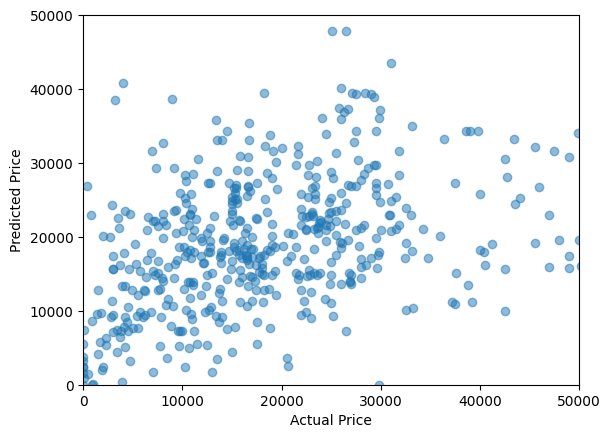

k = 10 | Mean Squared Error: 111588702.61873999


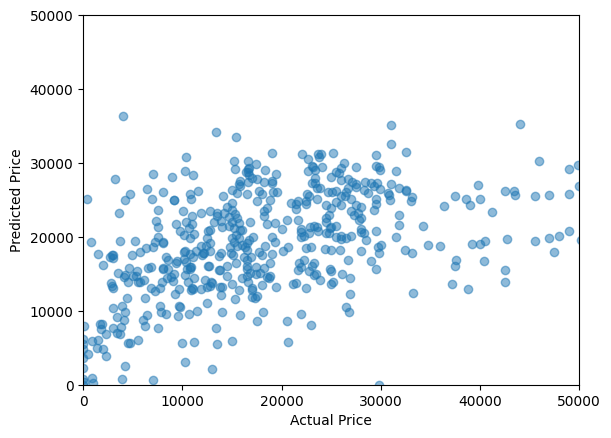

k = 25 | Mean Squared Error: 104962784.87012799


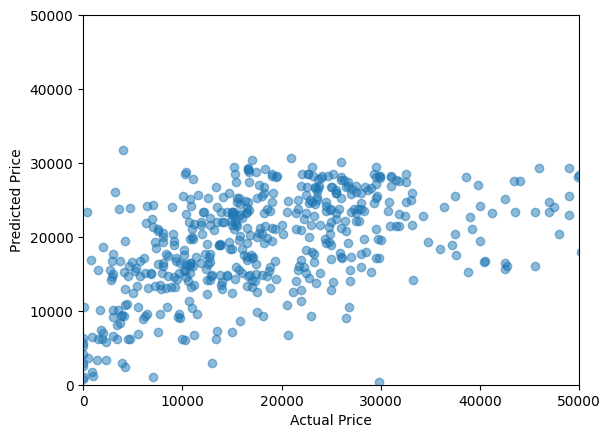

k = 50 | Mean Squared Error: 103873193.21996081


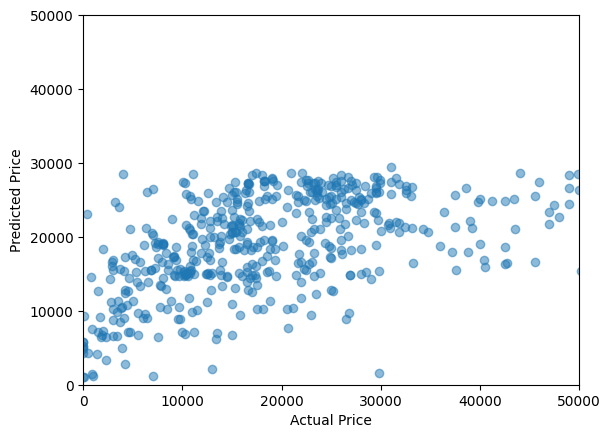

k = 100 | Mean Squared Error: 104534999.25921261


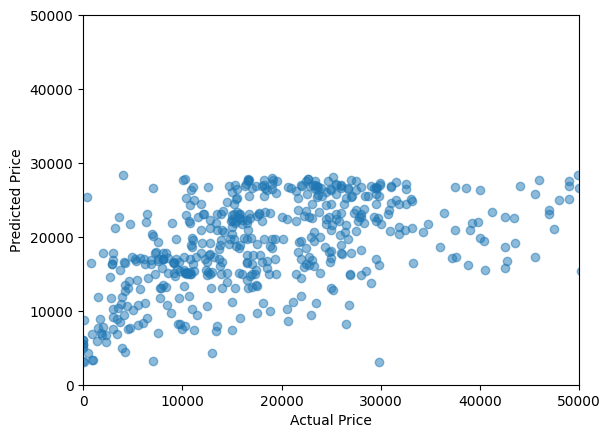

k = 300 | Mean Squared Error: 107657680.73624039


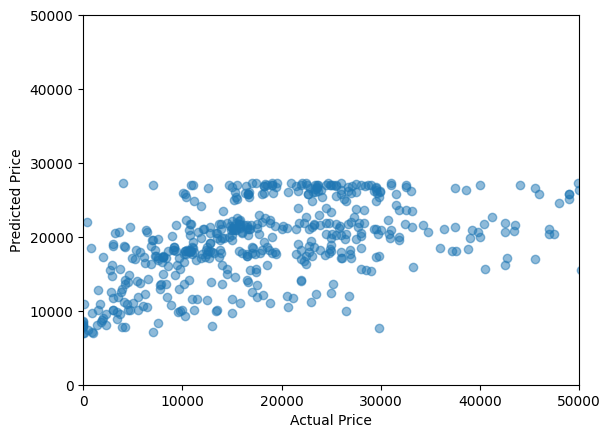

In [29]:
k_bar = [3,10,25,50,100,300]
from sklearn.neighbors import KNeighborsRegressor
SSE = {}
for i in k_bar:
  model = KNeighborsRegressor(n_neighbors=i)
  fitted_model = model.fit(X_train,y_train)
  y_pred = fitted_model.predict(X_test)
  mse = 1/len(y_test)*np.sum((y_test-y_pred)**2)
  print(f"k = {i} | Mean Squared Error: {mse}")
  SSE[i] = mse
  plt.scatter(y_test, y_pred, alpha=0.5)
  plt.xlabel('Actual Price')
  plt.ylabel('Predicted Price')
  plt.xlim(0, 50000)
  plt.ylim(0, 50000)
  plt.show()
# as K increases it starts to become more accurate, but after k = 10 it stops predicting any price above 30k

In [34]:
#Part 5
min(SSE, key = SSE.get)
#The optimal k is 50

50

In [ ]:
#Part 6
#When k was very small, the model was ovedrfitting, because it was just predicting based off of a very few number of neighboors, likely not very accurate and just due to the randomness of the training/testing split, not necessarily insight into actual value
#When k became very large, the model was underfitting, meaning that it did not place enough value on the insights from the training data, causing the predictions to be broad and never predict high values

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [141]:
#Part 1
df3 = pd.read_csv('/content/drive/MyDrive/UVA/ML/knn/data/zoo.csv')
print(df3.describe())
print(df3.head())
df4 = df3.drop(columns=['animal'])
df4.corr()['class']
#I thinkt that hair, eggs, milk, backbone, and tail will be good predictors since they have high correlation with class

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

,class
hair,-0.562384
feathers,-0.197520
eggs,0.661825
milk,-0.723683
airborne,0.022677
aquatic,0.326639
predator,0.061179
toothed,-0.471527
backbone,-0.828845
breathes,-0.519308


In [151]:
#Part 2
y1 = df4['class']
X1 = df4[['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,
                                                    test_size=.5,
                                                    random_state=65)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
78,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
45,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
95,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1
16,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


In [165]:
#Part 4
from sklearn.neighbors import KNeighborsClassifier

k_bar=50
SSE =[]
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train1,y_train1)
  y_hat = fitted_model.predict(X_test1)
  SSE.append(np.sum( (y_test1-y_hat)**2 ))
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1
print(k_star)
#I selected k* by minimizing the SSE

[3]


In [167]:
#part 5
model = KNeighborsClassifier(n_neighbors=3)
fitted_model = model.fit(X_train1,y_train1)
y_hat = fitted_model.predict(X_test1)
pd.crosstab(y_test1,y_hat)
#the model is very accurate at class 1 & 2, but seeems to struggle more with the others, often predicitng a class 7 as a class 4

col_0,1,2,4,5,6,7
class,,,,,,
1,19,0,0,0,0,0
2,0,8,0,0,0,0
3,1,0,2,1,0,0
4,0,0,8,0,0,0
5,0,0,0,2,0,0
6,0,0,0,0,4,0
7,0,0,4,0,1,1


In [183]:
#Part 5
X_train2 = X_train1[['milk', 'aquatic', 'airborne']]
X_test2 = X_test1[['milk', 'aquatic', 'airborne']]

model = KNeighborsClassifier(n_neighbors=3)
fitted_model = model.fit(X_train2,y_train1)
y_hat1 = fitted_model.predict(X_test2)
pd.crosstab(y_test1,y_hat1)
#only 1, 2, 4, & 6 are predicted

col_0,1,2,4
class,,,
1,19,0,0
2,0,7,1
3,0,3,1
4,0,0,8
5,0,0,2
6,0,4,0
7,0,4,2


In [185]:
probs = model.predict_proba(X_test2)
prob_df = pd.DataFrame(probs, columns=[f"Class {c}" for c in model.classes_])
prob_df.sum()
#Every class except class 5 is now being predicted with some probability
#The sums show the expected values of the # of apperances each type would have in the testing data

,0
Class 1,18.666667
Class 2,12.333333
Class 3,3.000000
Class 4,9.333333
Class 5,0.000000
Class 6,3.000000
Class 7,4.666667


**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [118]:
def gaussian(abs_z):
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * abs_z**2)
def uniform(abs_z):
        return np.where(abs_z <= 1, 0.5, 0.0)
def epanechnikov(abs_z):
        return np.where(abs_z <= 1, 0.75 * (1 - abs_z**2), 0.0)
#Define kernel functions outside of the kernel_plot() to save on complexity
def kernel_plot(data, kernel = 'gaussian', bandwidth = 'silverman'):
  #Set defaults to gaussian and silverman
  N = len(data)
  # Convert Pandas Series to NumPy array
  if type(data) is pd.Series:
      data = data.to_numpy()

  #I added this so they would be capitalized in the title and arent case sensitive when inputted into the function
  if type(bandwidth) is str:
    bandwidth = bandwidth.title()
  kernel = kernel.title()

  #Set bandwidth h
  if bandwidth == 'Silverman':
    q75= np.percentile(data, 75)
    q25= np.percentile(data, 25)
    iqr = q75 - q25
    std = np.std(data)
    h = 1.06 * std * N**(-1/5)
  else: h = float(bandwidth)

 #Calculating distances
  x_min = np.min(data) - 3 * h
  x_max = np.max(data) + 3 * h
  x_grid = np.linspace(x_min, x_max, 1000)
  grid_2d = x_grid.reshape(-1, 1)
  data_2d = data.reshape(-1, 1)
  from scipy.spatial.distance import cdist
  distances = cdist(grid_2d, data_2d)

  #Kernel Density Calcualtions
  abs_z = distances / h
  if kernel == 'Gaussian':
    density = np.sum(gaussian(abs_z), axis=1) / (N * h)
  elif kernel == 'Uniform':
     density = np.sum(uniform(abs_z), axis=1) / (N * h)
  elif kernel == 'Epanechnikov':
    density = np.sum(epanechnikov(abs_z), axis=1) / (N * h)

  #Plotting Kernel Density Plot
  plt.plot(x_grid, density)
  title = f"Kernel Desnity Plot for {kernel} Kernel with Bandwidth = {bandwidth}"
  plt.title(title)
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.grid(True)
  plt.show()

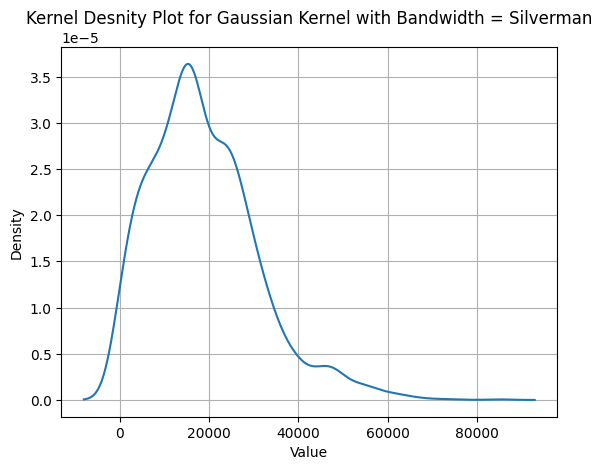

In [119]:
kernel_plot(data = q2df['price'])

<Axes: xlabel='price', ylabel='Density'>

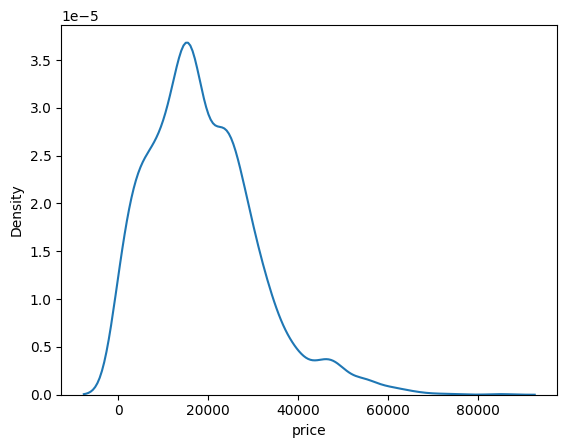

In [120]:
sns.kdeplot(q2df['price'])